# Ejercicio 9 - Aprendizaje por Refuerzos III
## Inteligencia Artificial - Ing. en Sistemas de Información 
## UTN Facultad Regional Villa Maria
### Natalia Bruno - Legajo: 10683

Fecha de entrega: **27/06/2017**

1.1 Modifique la implementación de Q-Learning realizada en el TP 8, para integrar aprendizaje basado en modelos (Dyna-Q).

1.2 Compare la convergencia de la implementación basada en $Sarsa(\lambda)$, respecto a la implementación de Dyna-Q empleando una gráfica de Steps Acumulados Promedio vs. Episodio.

### Implementacion $Sarsa(\lambda)$

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# Seteamos valores de las trazas para cada estado
e = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

# Lambda = parametro de decaimiento de la traza
LAMBDA = 0.5

# Interacción en un episodio
def oneEpisodeSlamda():
    # Acumulador de steps en el episodio
    time = 0

    # Estado inicial
    currentState = startState

    # Selección de acción basade en epsilon-greedy
    if np.random.binomial(1, EPSILON) == 1:
        currentAction = np.random.choice(actions)
    else:
        currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])

    # iIteractuar hasta arribar al estado objetivo
    while currentState != goalState:
        # Take action a, observe r, s'
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        
        # Choose a' from s' using policy derived from Q e-greedy
        if np.random.binomial(1, EPSILON) == 1:
            newAction = np.random.choice(actions)
        else:
            newAction = np.argmax(stateActionValues[newState[0], newState[1], :])
        
        # Sarsa(lambda) update
        delta = (REWARD + stateActionValues[newState[0], newState[1], newAction] - stateActionValues[currentState[0], currentState[1], currentAction])
        
        e[currentState[0]][currentState[1]][currentAction] += 1 
        
        for i in range(0, WORLD_HEIGHT):
            for j in range(0, WORLD_WIDTH):
                for a in actions:
                    stateActionValues[i, j, a] += ALPHA * (delta) * e[i][j][a]
                
                    e[i][j][a] = LAMBDA * e[i][j][a]     
            
        currentState = newState
        currentAction = newAction
        time += 1
    return time

# Ejecutamos 500 episodios, obteniendo la politica óptima y gráfica
episodeLimit = 500
ep = 0
episodesLambda = []
times = []
while ep < episodeLimit:
    times.append(oneEpisodeSlamda())
    episodesLambda.append(np.sum(times)/(len(times)))
    ep += 1

### Punto 1.1 Implementación Dyna-Q

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

# Definimos el valor de n 
n = 8

# tamaño del entorno (Alto)
WORLD_HEIGHT = 7

# tamaño del entorno (Ancho)
WORLD_WIDTH = 10

# Creamos una matriz MR y otra MS las que deben ser igual al mundo, donde se guardan en cada estado el reward y estado siguiente
# Correspondiente a la ejecucion de la accion A en el estado S
# M(S,A) <-- R, S'
modelR = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
modelSi = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
modelSj = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))

# Fuerza del viento para cada columna
WIND = [0, 0, 0, 1, 1, 1, 2, 2, 1, 0]

# Acciones posibles
ACTION_UP = 0
ACTION_DOWN = 1
ACTION_LEFT = 2
ACTION_RIGHT = 3

# probabilidad de exploración
EPSILON = 0.1

# Learning rate
ALPHA = 0.5

# reward
REWARD = -1.0

# Valor de los pares estado acción
stateActionValues = np.zeros((WORLD_HEIGHT, WORLD_WIDTH, 4))
startState = [3, 0]
goalState = [3, 7]
actions = [ACTION_UP, ACTION_DOWN, ACTION_LEFT, ACTION_RIGHT]

# transiciones de estado
actionDestination = []
for i in range(0, WORLD_HEIGHT):
    actionDestination.append([])
    for j in range(0, WORLD_WIDTH):
        destination = dict()
        destination[ACTION_UP] = [max(i - 1 - WIND[j], 0), j]
        destination[ACTION_DOWN] = [max(min(i + 1 - WIND[j], WORLD_HEIGHT - 1), 0), j]
        destination[ACTION_LEFT] = [max(i - WIND[j], 0), max(j - 1, 0)]
        destination[ACTION_RIGHT] = [max(i - WIND[j], 0), min(j + 1, WORLD_WIDTH - 1)]
        actionDestination[-1].append(destination)

# Interacción en un episodio
def oneEpisodeQL():
    # Acumulador de steps en el episodio
    time = 0

    # Estado inicial
    currentState = startState

    # interactuar hasta arribar al estado objetivo
    while currentState != goalState:
        
        # Choose A from S using policy derived from Q e-greedy
        if np.random.binomial(1, EPSILON) == 1:
            currentAction = np.random.choice(actions)
        else:
            currentAction = np.argmax(stateActionValues[currentState[0], currentState[1], :])
        
        # Take action A, obverve R, S'
        newState = actionDestination[currentState[0]][currentState[1]][currentAction]
        
        # Off policy update
        stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (REWARD + max(stateActionValues[newState[0], newState[1], :]) -
            stateActionValues[currentState[0], currentState[1], currentAction])
        
        currentState = newState
        
        #Model(S, A) <-- R, S'
        modelR[currentState[0]][currentState[1]][currentAction] = REWARD
        modelSi[currentState[0]][currentState[1]][currentAction] = newState[0]
        modelSj[currentState[0]][currentState[1]][currentAction] = newState[1]
        
        for nro in range(0, n):
            # random previusly observed state
            i = np.random.randint(0, WORLD_HEIGHT-1)
            j = np.random.randint(0, WORLD_WIDTH-1)
            
            # random action previusly taken in S
            action = np.random.choice(actions)
            
            # update
            stateActionValues[currentState[0], currentState[1], currentAction] += \
            ALPHA * (modelR[i][j][action] + max(stateActionValues[int(modelSi[i][j][action]), int(modelSj[i][j][action]), :]) -
                     stateActionValues[currentState[0], currentState[1], currentAction])                
        time += 1
    return time

### Punto 1.2 Comparación convergencia

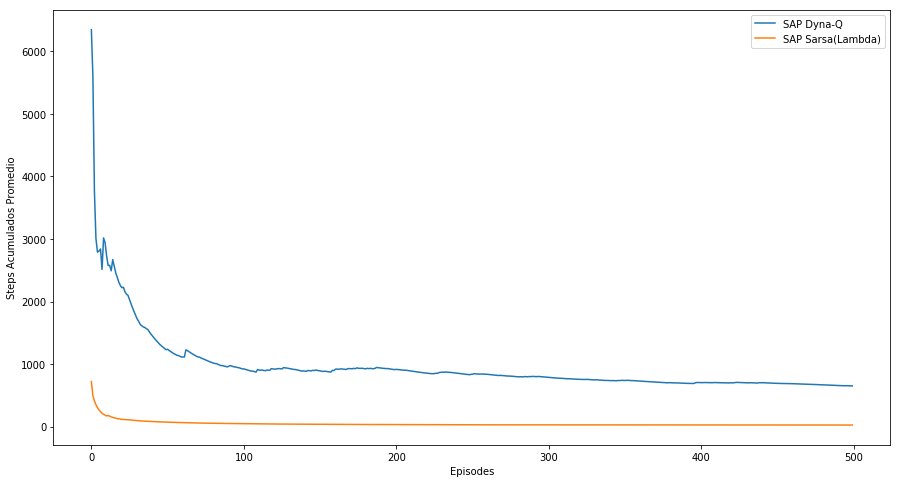

['D', 'D', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'R']
['U', 'D', 'R', 'R', 'U', 'R', 'R', 'L', 'U', 'D']
['U', 'U', 'D', 'R', 'R', 'U', 'R', 'L', 'L', 'U']
['U', 'U', 'D', 'R', 'U', 'R', 'R', 'G', 'U', 'D']
['U', 'L', 'R', 'R', 'R', 'D', 'U', 'D', 'L', 'L']
['D', 'R', 'L', 'R', 'U', 'U', 'U', 'L', 'R', 'D']
['D', 'L', 'R', 'R', 'U', 'U', 'U', 'U', 'U', 'L']
['0', '0', '0', '1', '1', '1', '2', '2', '1', '0']


In [3]:
# Ejecutamos 500 episodios, obteniendo la politica óptima y gráfica

episodeLimit = 500
ep = 0
episodes = []
times = []
while ep < episodeLimit:
    times.append(oneEpisodeQL())
    episodes.append(np.sum(times)/(len(times)))
    ep += 1

plt.figure(figsize=(15, 8))
plt.plot(episodes, label='SAP Dyna-Q')
plt.plot(episodesLambda, label='SAP Sarsa(Lambda)')
plt.xlabel('Episodes')
plt.ylabel('Steps Acumulados Promedio')
plt.legend(loc='best') 
plt.show()

# Selección Greedy sobre la política...
optimalPolicy = []
for i in range(0, WORLD_HEIGHT):
    optimalPolicy.append([])
    for j in range(0, WORLD_WIDTH):
        if [i, j] == goalState:
            optimalPolicy[-1].append('G')
            continue
        bestAction = np.argmax(stateActionValues[i, j, :])
        if bestAction == ACTION_UP:
            optimalPolicy[-1].append('U')
        elif bestAction == ACTION_DOWN:
            optimalPolicy[-1].append('D')
        elif bestAction == ACTION_LEFT:
            optimalPolicy[-1].append('L')
        elif bestAction == ACTION_RIGHT:
            optimalPolicy[-1].append('R')
for row in optimalPolicy:
    print(row)
print([str(w) for w in WIND])

Se puede ver en el gráfico que el efecto de los modelos comienza luego de varias iteraciones dado que al principio los valores del modelo son todos 0 y por lo tanto la selección aleatoria del estado S y la acción A la hace sobre todos valores iguales a 0.